# World Happiness Report Project

In [114]:
# importing all necessary packages/Libraries:
import warnings 
warnings.simplefilter('ignore')
import pickle
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Now we can read the File by using pandas liberabry:
Worldhappiness= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [4]:
Worldhappiness.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
Worldhappiness.columns


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
Worldhappiness.shape


(158, 12)

In [9]:
Worldhappiness.isnull().sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
Worldhappiness.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
Worldhappiness.describe()


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
Worldhappiness.columns


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Dropping categorical data that are not contributing to the label prediction:

In [13]:
Worldhappiness1=Worldhappiness.drop(['Country','Region','Happiness Rank'],axis=1)


Here we have dropped the coloumns using drop command.



# Visualizing the data:

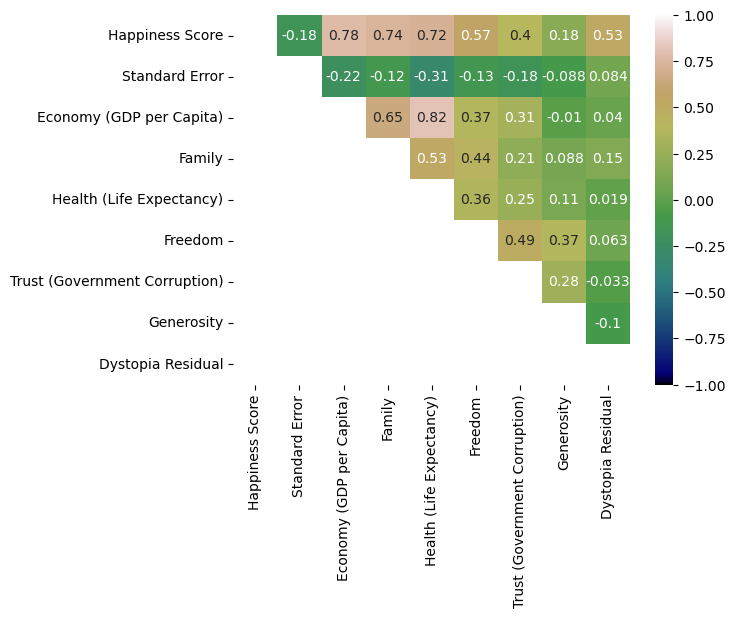

In [15]:
upper_triangel=np.tril(Worldhappiness1.corr())
sns.heatmap(Worldhappiness1.corr(),vmin=-1,vmax=1,annot=True,annot_kws={'size':10},cmap='gist_earth',mask=upper_triangel)
plt.show()

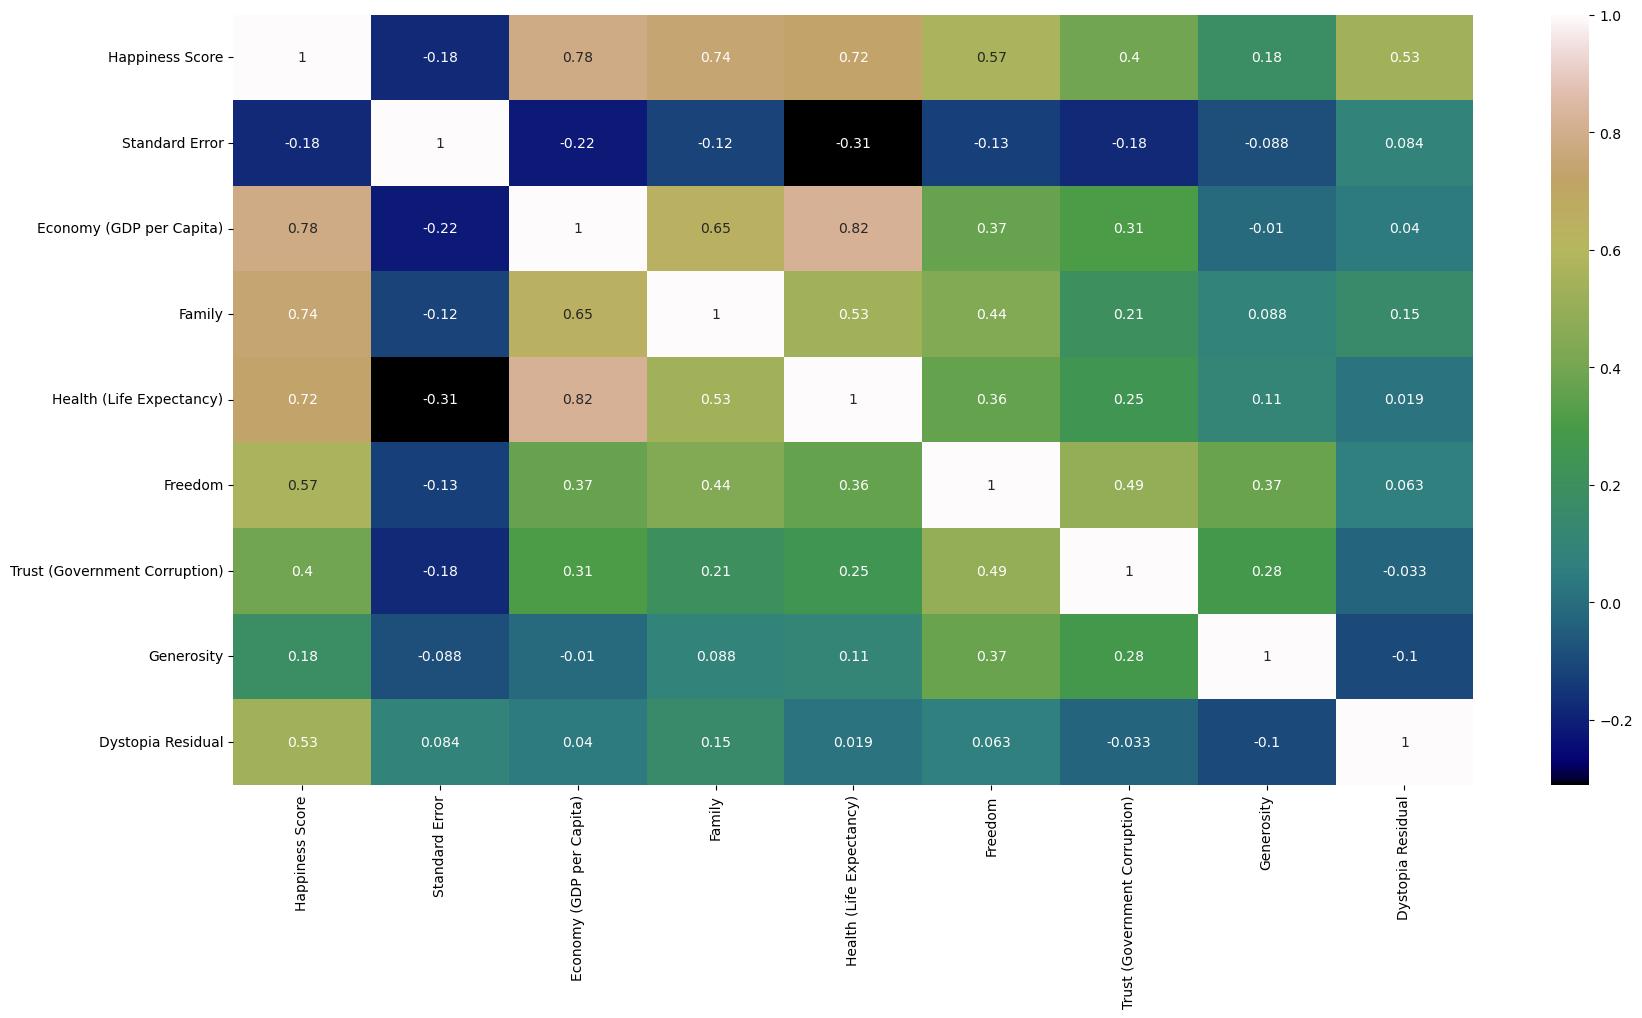

In [16]:
corr_hmap=Worldhappiness1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_hmap,annot=True,cmap='gist_earth')
plt.show()

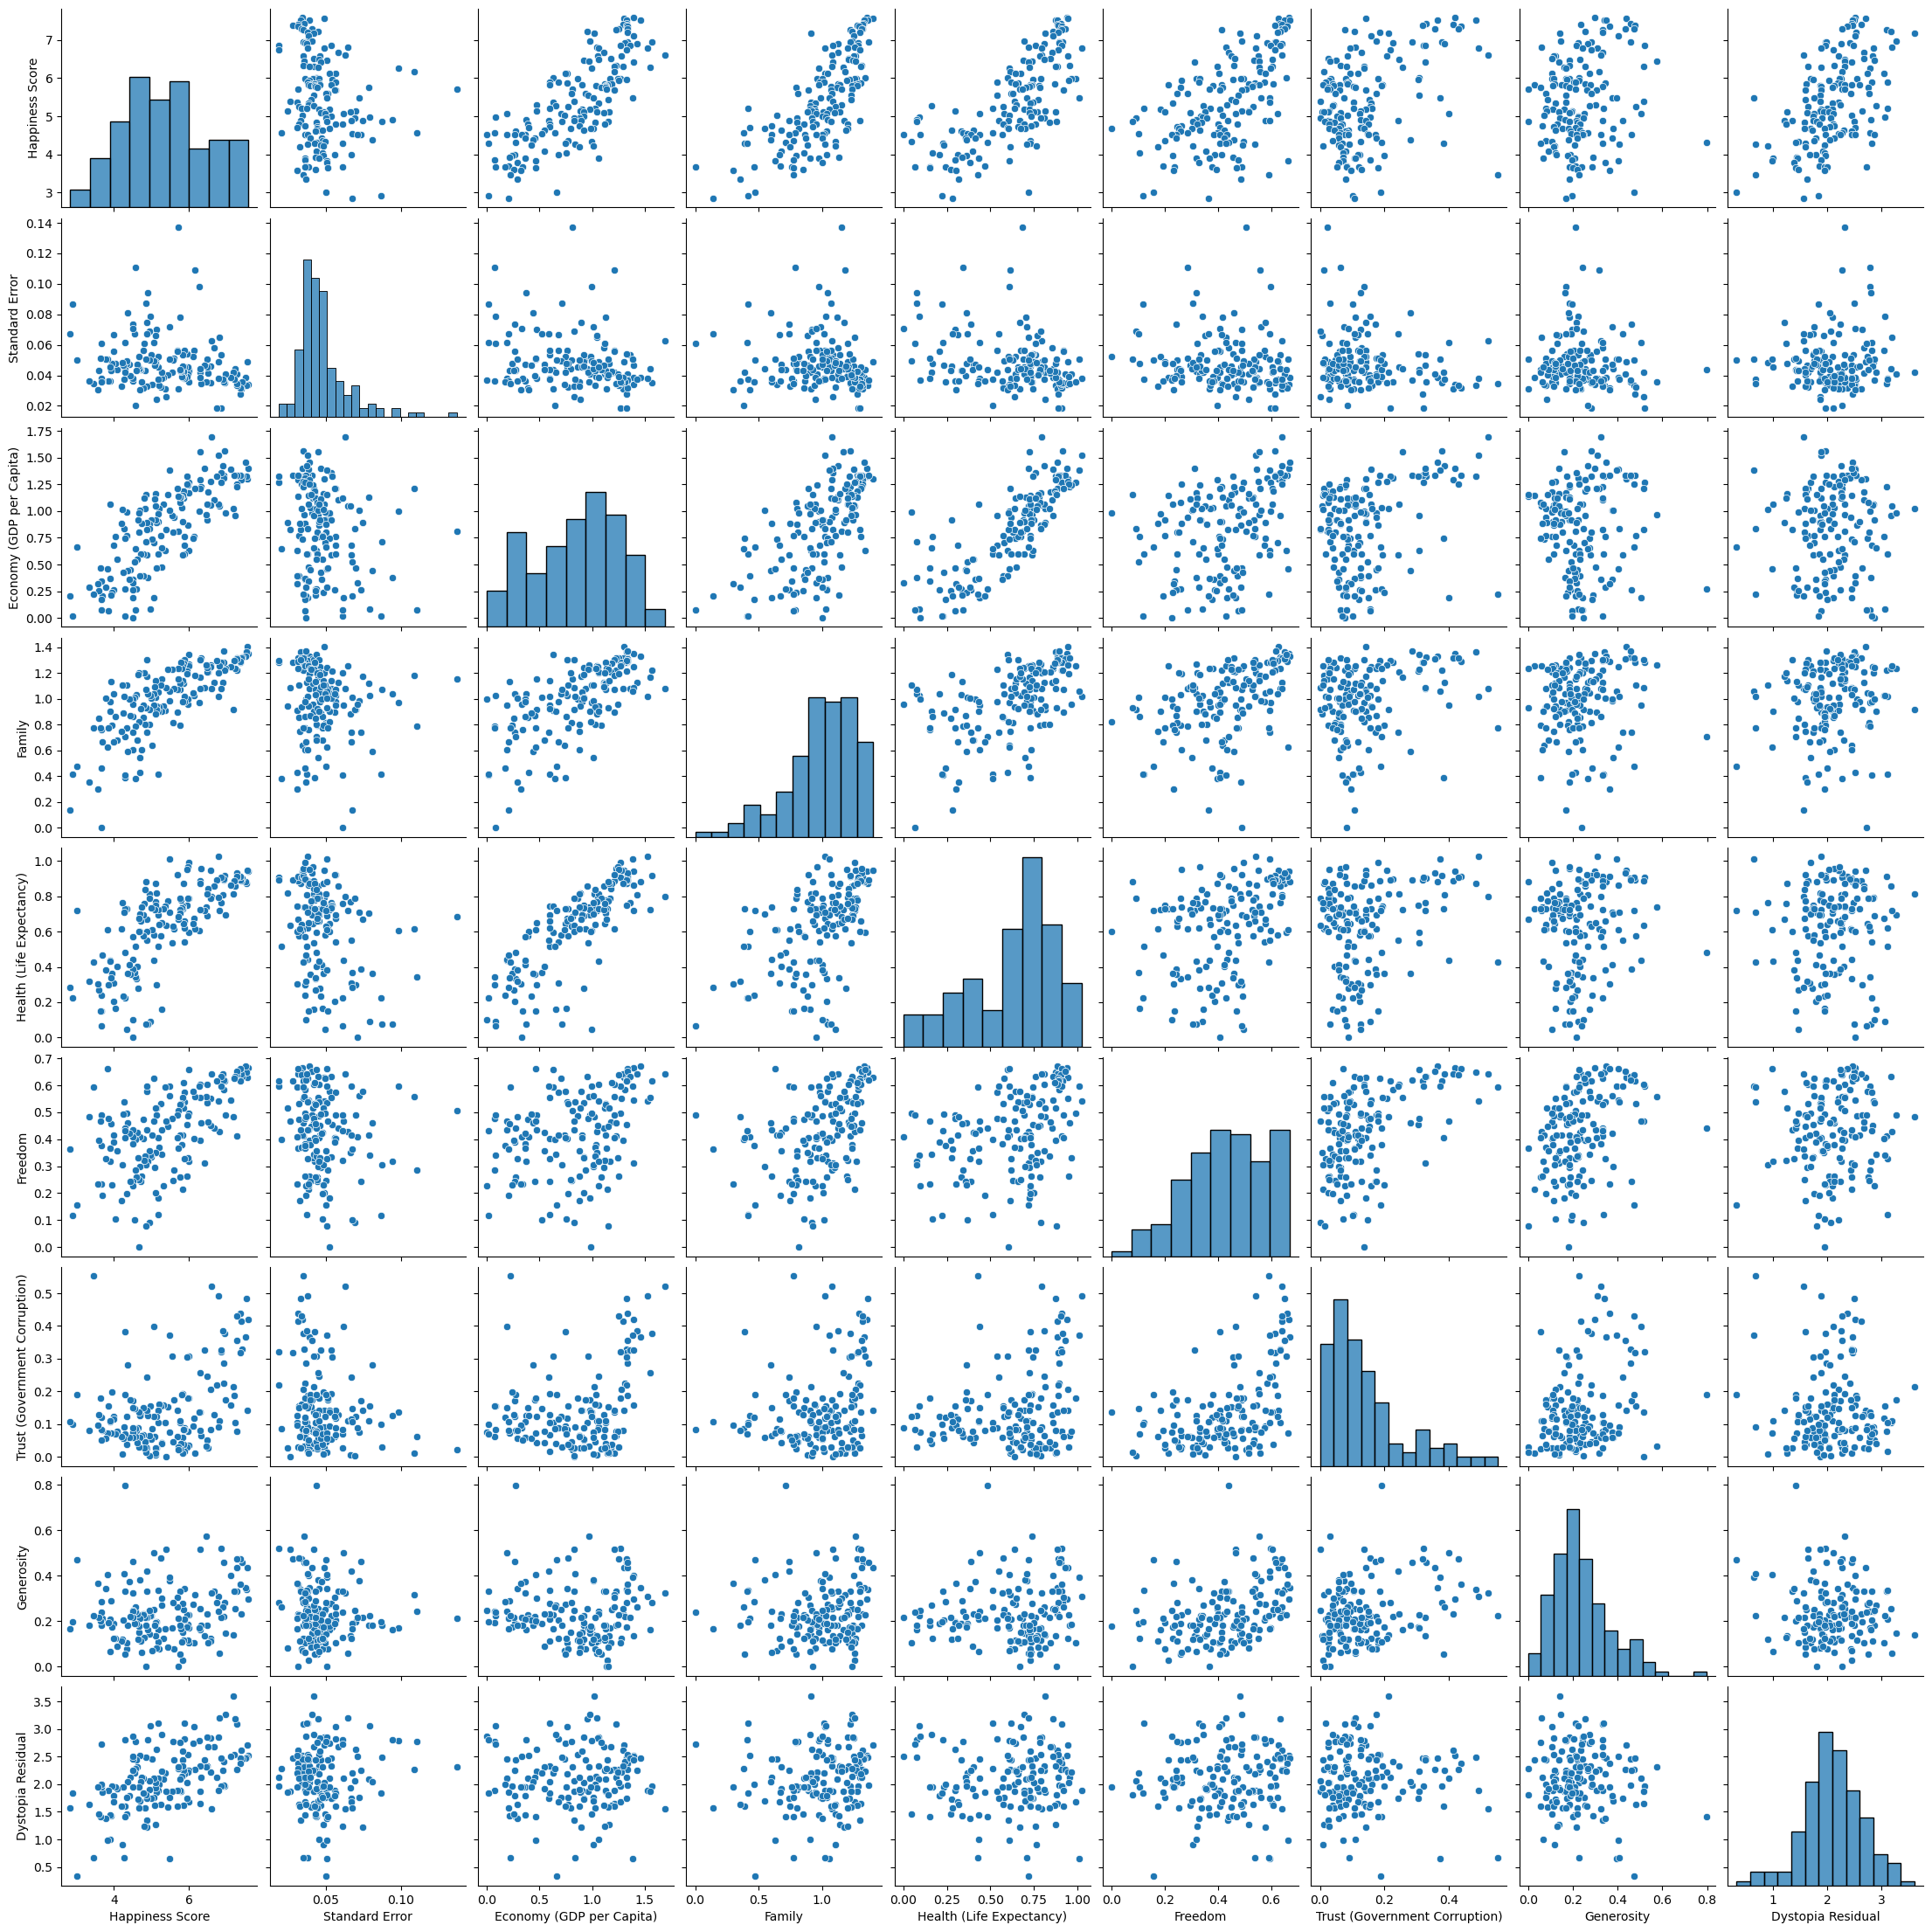

In [19]:
#Using the PairPlot:
sns.pairplot(Worldhappiness1)
plt.show()

In pairplot we can see how datas are distributed by using scatter Plot and histogram .



# Applying Histogram:

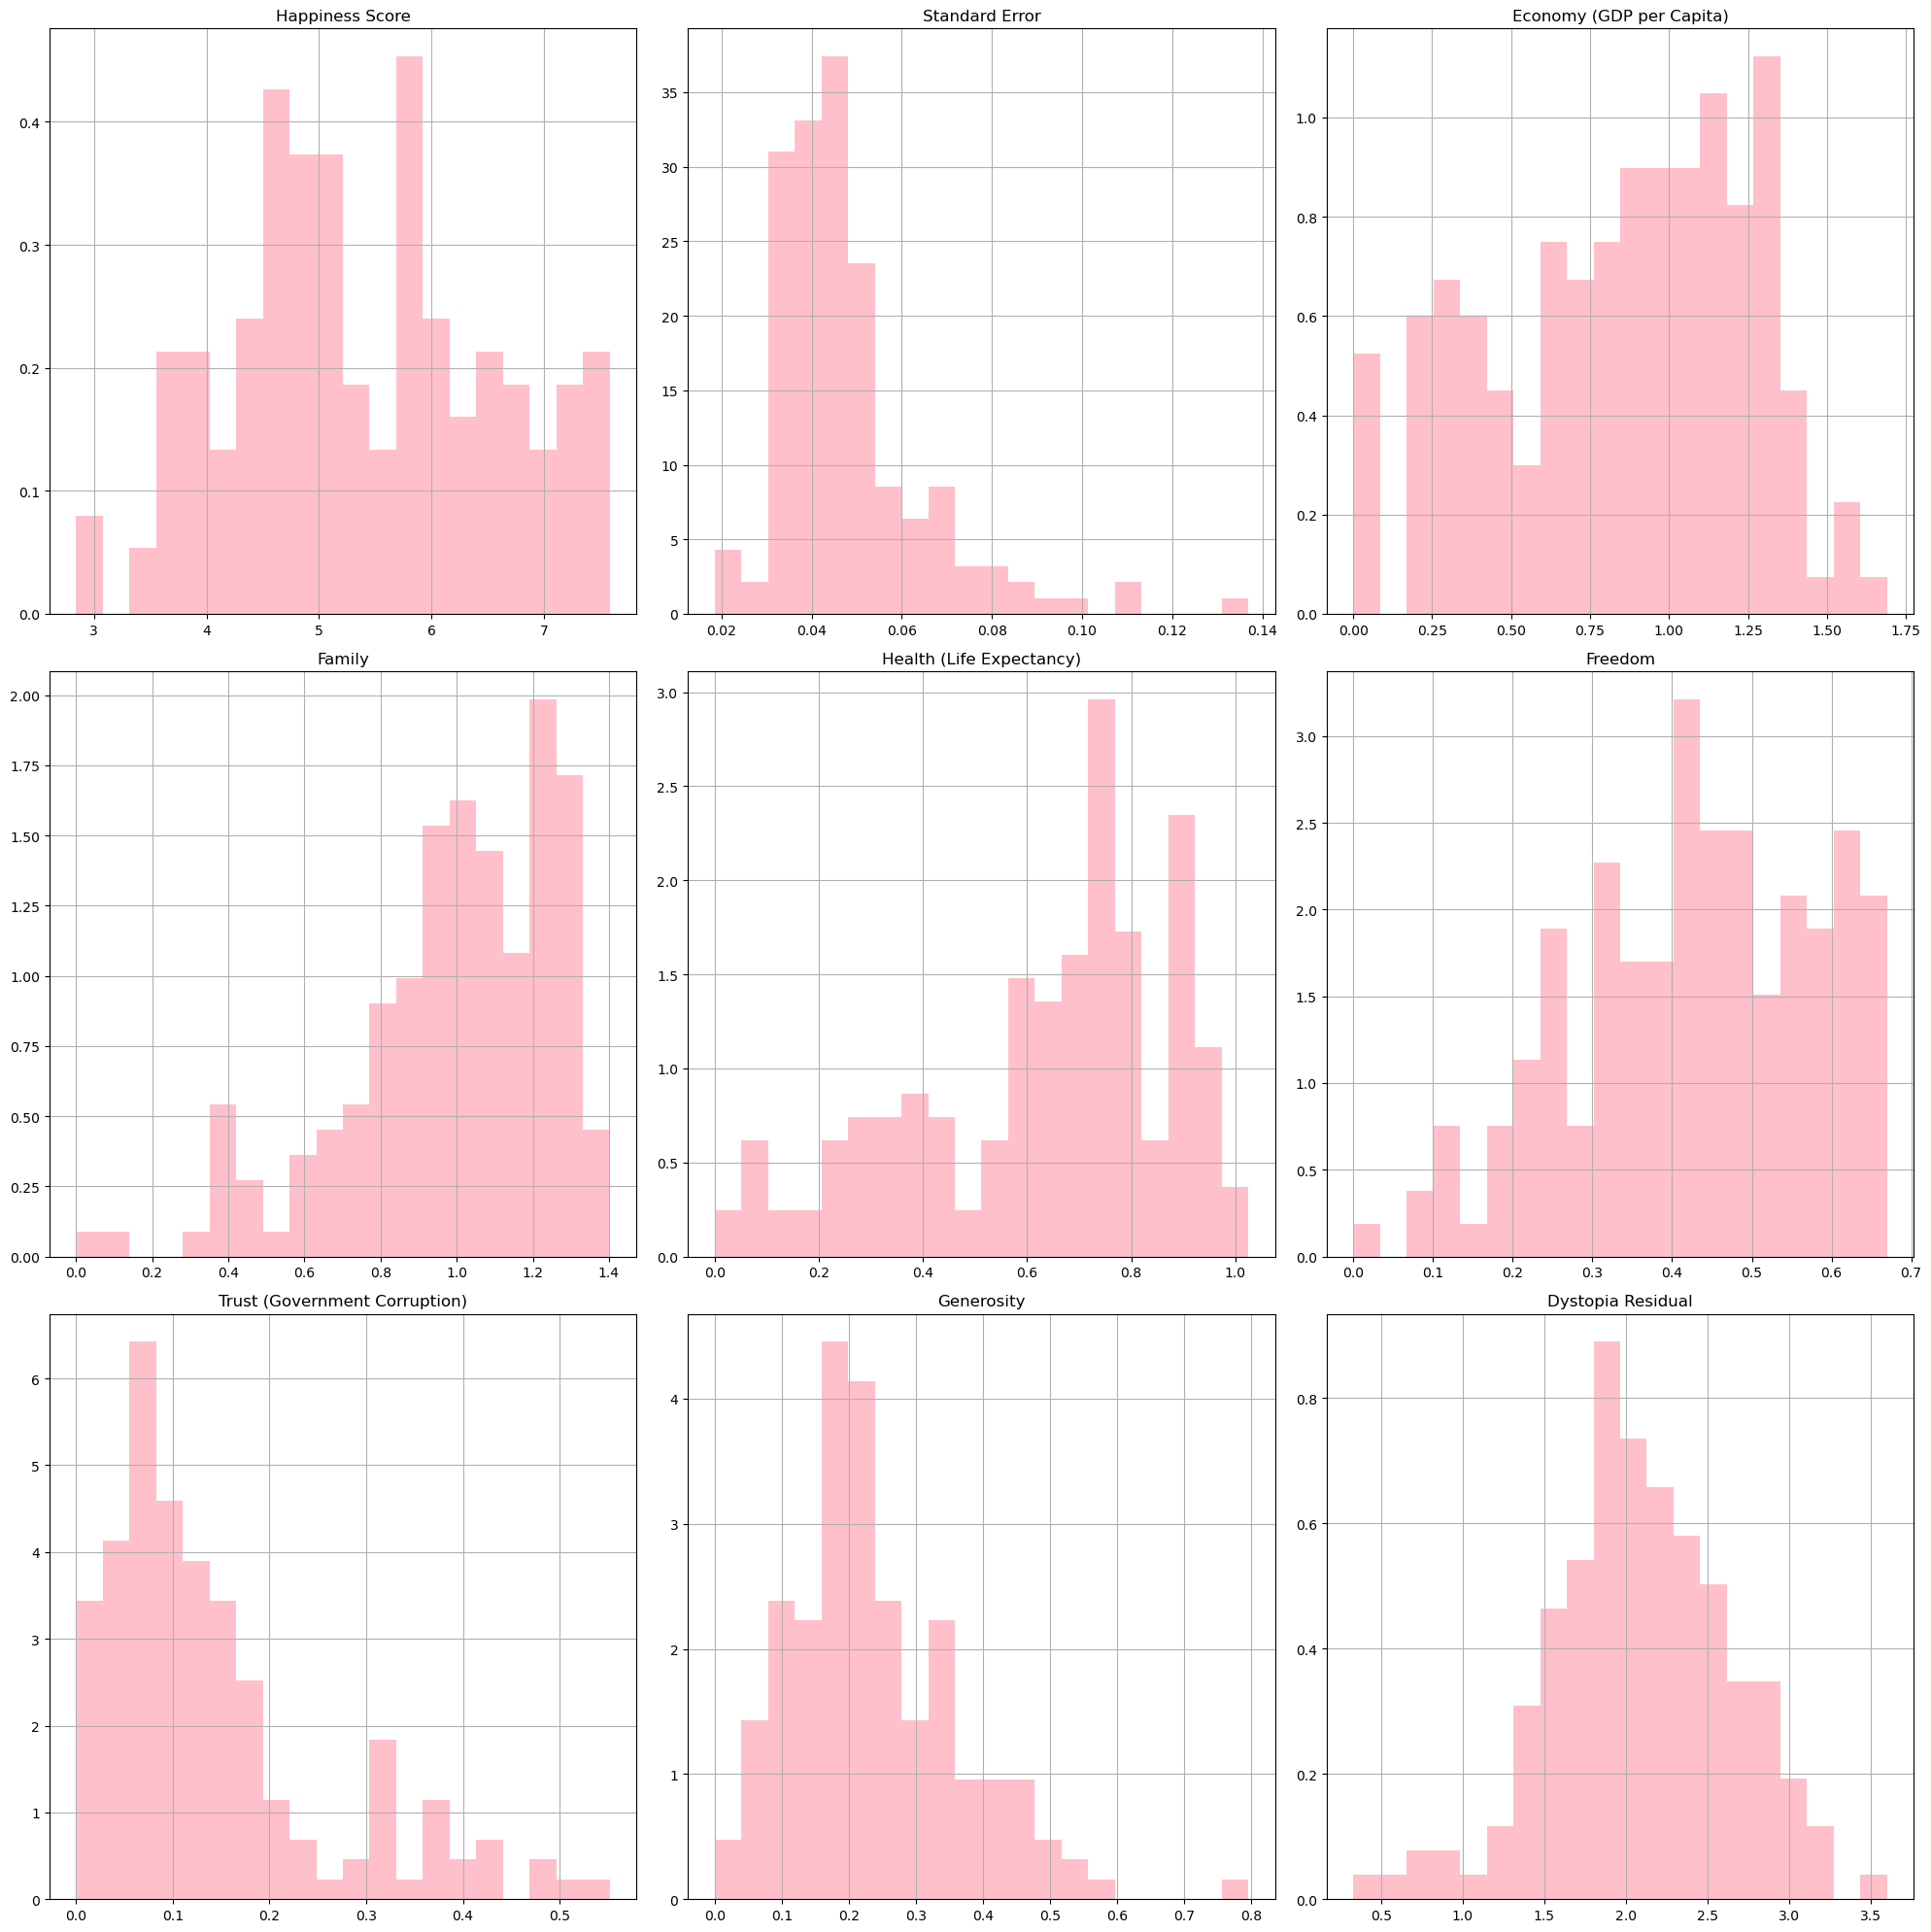

In [21]:
plt.rcParams['figure.figsize']=(20,20)
Worldhappiness1.hist(bins=20,color='pink',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

# Box Ploting:

Happiness Score                     Axes(0.125,0.747241;0.0945122x0.132759)
Standard Error                   Axes(0.238415,0.747241;0.0945122x0.132759)
Economy (GDP per Capita)         Axes(0.351829,0.747241;0.0945122x0.132759)
Family                           Axes(0.465244,0.747241;0.0945122x0.132759)
Health (Life Expectancy)         Axes(0.578659,0.747241;0.0945122x0.132759)
Freedom                          Axes(0.692073,0.747241;0.0945122x0.132759)
Trust (Government Corruption)    Axes(0.805488,0.747241;0.0945122x0.132759)
Generosity                          Axes(0.125,0.587931;0.0945122x0.132759)
Dystopia Residual                Axes(0.238415,0.587931;0.0945122x0.132759)
dtype: object

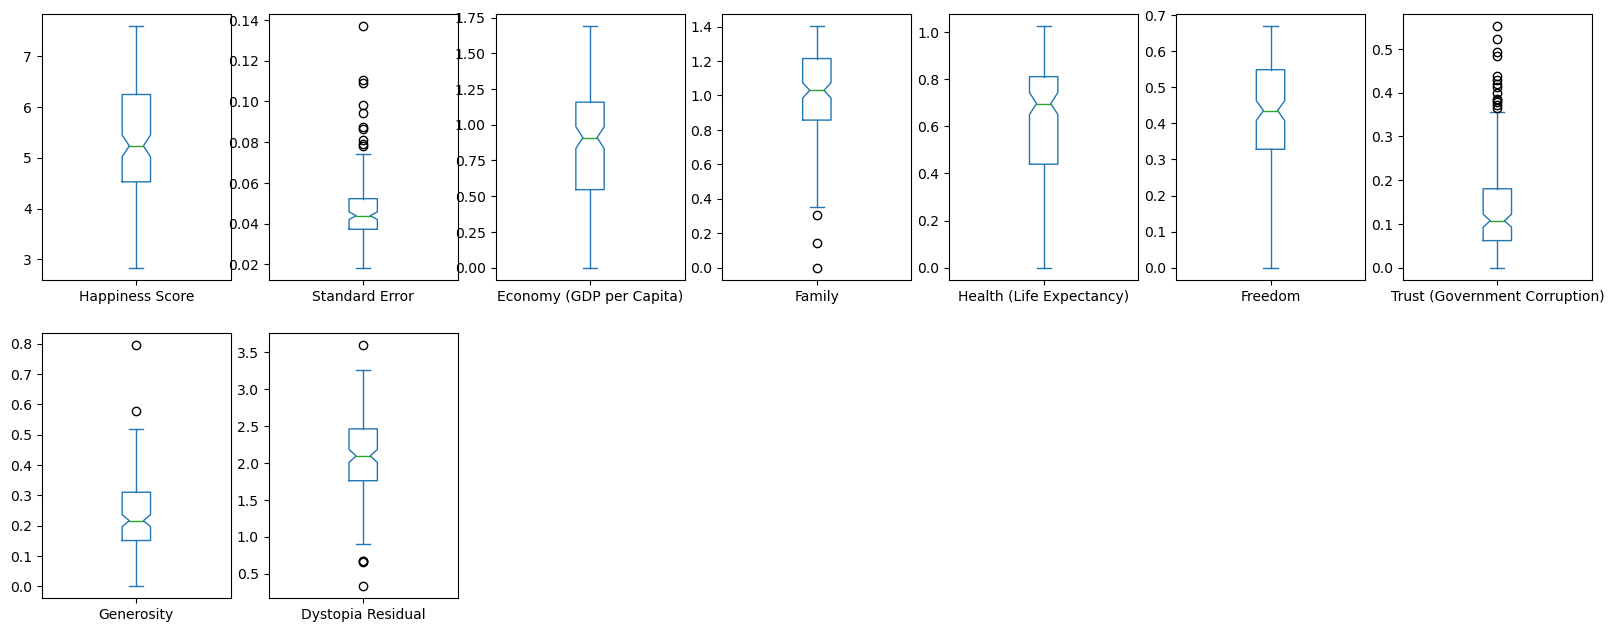

In [22]:
Worldhappiness1.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20),notch=True)


# Finding Skewness by using skew()

In [23]:
Worldhappiness1.skew()


Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Outilier removal:

Acceptable range of Skewness: -0.5/+0,5



In [30]:
from scipy.stats import zscore


In [31]:
# z Score Method:
z=np.abs(zscore(Worldhappiness1))
threshold=3
np.where(z>3)
Worldhappiness2=Worldhappiness1[(z<3).all(axis=1)]
Worldhappiness2

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [32]:
# Percentage of Data Loss:
data_loss=(158-149)/158*100
data_loss

5.69620253164557

# Splitting the dataset into 2 variables namely 'x','y' for feature and label

In [33]:
x=Worldhappiness2.drop('Happiness Score',axis=1)# list of all Feature
y=Worldhappiness2['Happiness Score'] # Label

In [34]:
x.shape


(149, 8)

In [35]:
y.shape


(149,)

In [36]:
x.head()


,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [37]:
y.head()


0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

# Scaling

In [52]:
from sklearn.preprocessing import PowerTransformer


In [53]:
scale1=PowerTransformer(method='yeo-johnson')
x_scaled=pd.DataFrame(scale1.fit_transform(x),columns=x.columns)

x_scaled


,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...
144,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


In [65]:
from sklearn.model_selection import train_test_split


In [66]:
#Creating the Training and Testing data sets:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.75, random_state=42, shuffle=True)

We are taking 75% of the total data present in the dataset for training prupose and the remaining 25% will be used in testing purpose



# Machine Learning Model for Regression:

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor



In [63]:
# Model Selection:
linear_model=LinearRegression()
svr_model=SVR(C=1.0,epsilon=0.2,kernel='poly',gamma='auto')
dtr_model=DecisionTreeRegressor(criterion='poisson',random_state=111)
rfr_model=RandomForestRegressor(max_depth=2,max_features="sqrt")
knr_model=KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')

In [67]:
# Training the Models:
linear_model.fit(x_train,y_train)
svr_model.fit(x_train,y_train)
dtr_model.fit(x_train,y_train)
rfr_model.fit(x_train,y_train)
knr_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [68]:
#Prediction:
pred_linear=linear_model.predict(x_test)
pred_svr=svr_model.predict(x_test)
pred_dtr=dtr_model.predict(x_test)
pred_rfr=rfr_model.predict(x_test)
pred_knr=knr_model.predict(x_test)

# Evaluation Metrics

In [87]:
se_linaer=mean_squared_error(y_test,pred_linear)
se_svr=mean_squared_error(y_test,pred_svr)
se_dtr=mean_squared_error(y_test,pred_dtr)
se_rfr=mean_squared_error(y_test,pred_rfr)
se_knr=mean_squared_error(y_test,pred_knr)

rmse_linear=sqrt(se_linaer)
rmse_svr=sqrt(se_svr)
rmse_dtr=sqrt(se_dtr)
rmse_rfr=sqrt(se_rfr)
rmse_knr=sqrt(se_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)
print(f"RMSE of Decision Tree Regressor is: ", rmse_dtr)
print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  0.0663845861038015
RMSE of Support Vector Regression is:  0.43020959342150195
RMSE of Decision Tree Regressor is:  0.464762786126881
RMSE of Random Forest Regressor is:  0.6315337383883796
RMSE of K Neighbors Regressor is:  0.34579756208997253


In [88]:
#R2 Score for the model:

print(f"R2 Score for Linear Regression is:",r2_score(y_test,pred_linear,multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is:",r2_score(y_test,pred_svr,multioutput='variance_weighted')*100)
print(f"R2 Score for Decision Tree Regressor  is:",r2_score(y_test,pred_dtr,multioutput='variance_weighted')*100)
print(f"R2 Score for Random Forest Regressor  is:",r2_score(y_test,pred_rfr,multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor  is:",r2_score(y_test,pred_knr,multioutput='variance_weighted')*100)

R2 Score for Linear Regression is: 99.61289492395045
R2 Score for Support Vector Regression is: 83.74247075798078
R2 Score for Decision Tree Regressor  is: 81.02608041924005
R2 Score for Random Forest Regressor  is: 64.96618146755704
R2 Score for K Neighbors Regressor  is: 89.49639897867345


In [97]:
#Hyper Parameter Tuning on the best ML Model:
Lr_Param={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[1,2,3,4,5,6,7,8,9,10]}
    

In [112]:
from sklearn.model_selection import GridSearchCV
GSCV=GridSearchCV(LinearRegression(),Lr_Param,cv=5)


In [115]:
GSCV.fit(x_train,y_train)


ValueError: Invalid parameter 'normalize' for estimator LinearRegression(n_jobs=1). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [116]:
GSCV.best_params_


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'